<a href="https://colab.research.google.com/github/anny-0212/AI/blob/master/0604.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

In [14]:
!pwd

import os
os.chdir("");
#交換資料夾

/content/drive/My Drive/Colab Notebooks


In [18]:
from tensorflow.keras.applications import VGG16
model=VGG16()
model.summary()

553467904/553467096 [==============================] - 3s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
____________________________________________________________

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [0]:
model = tf.keras.applications.InceptionV3(include_top=True,weights='imagenet')

#model = tf.keras.applications.InceptionV3(include_top=False,weights='imagenet')


In [45]:
model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d_282 (Conv2D)             (None, 149, 149, 32) 864         input_5[0][0]                    
__________________________________________________________________________________________________
batch_normalization_282 (BatchN (None, 149, 149, 32) 96          conv2d_282[0][0]                 
__________________________________________________________________________________________________
activation_282 (Activation)     (None, 149, 149, 32) 0           batch_normalization_282[0][0]    
_______________________________________________________________________________________

In [34]:
!wget https://ichef.bbci.co.uk/news/ws/410/amz/worldservice/live/assets/images/2016/05/04/160504082300__89466673_elephant2.jpg

--2020-06-04 06:54:48--  https://ichef.bbci.co.uk/news/ws/410/amz/worldservice/live/assets/images/2016/05/04/160504082300__89466673_elephant2.jpg
Resolving ichef.bbci.co.uk (ichef.bbci.co.uk)... 173.223.102.204, 2600:1402:19:48d::f33, 2600:1402:19:488::f33
Connecting to ichef.bbci.co.uk (ichef.bbci.co.uk)|173.223.102.204|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16814 (16K) [image/jpeg]
Saving to: ‘160504082300__89466673_elephant2.jpg’

160504082300__89466 100%[===================>]  16.42K  --.-KB/s    in 0.001s  

2020-06-04 06:54:48 (10.8 MB/s) - ‘160504082300__89466673_elephant2.jpg’ saved [16814/16814]



In [0]:
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.applications.inception_v3 import decode_predictions

In [0]:
def read_img(img_path, resize=(299,299)):
    img_string = tf.io.read_file(img_path)  # 讀取檔案
    img_decode = tf.image.decode_image(img_string)  # 將檔案以影像格式來解碼
    img_decode = tf.image.resize(img_decode, resize)  # 將影像resize到網路輸入大小
    # 將影像格式增加到4維(batch, height, width, channels)，模型預測要求格式
    img_decode = tf.expand_dims(img_decode, axis=0)
    return img_decode

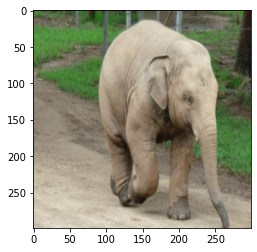

In [42]:
img_path='./160504082300__89466673_elephant2.jpg'
img=read_img(img_path)
plt.imshow(tf.cast(img,tf.uint8)[0])

In [46]:
img = preprocess_input(img)  # 影像前處理
preds = model.predict(img)  # 預測圖片
print("Predicted:", decode_predictions(preds, top=3)[0])  # 輸出預測最高的三個類別

40960/35363 [==================================] - 0s 0us/step
Predicted: [('n01930112', 'nematode', 0.13256462), ('n03729826', 'matchstick', 0.10283805), ('n03196217', 'digital_clock', 0.040645722)]


In [0]:
import tensorflow as tf
import tensorflow_hub as hub

In [0]:
# Inception V3預訓練模型的URL
module_url = "https://tfhub.dev/google/tf2-preview/inception_v3/classification/4"

# 創建一個Sequential Model，網路模型裡面包含了Inception V3網路層
model = tf.keras.Sequential([
    # hub.KerasLayer將載入的Inception V3模型封裝成網路層(Keras Layer)
    hub.KerasLayer(module_url, 
                  input_shape=(299, 299, 3),  # 模型輸入大小
                   output_shape=(1001, ),   # 模型輸出大小
                   name='Inception_v3')  # 網路層名稱
])

In [49]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Inception_v3 (KerasLayer)    (None, 1001)              23853833  
Total params: 23,853,833
Trainable params: 0
Non-trainable params: 23,853,833
_________________________________________________________________


In [0]:
def read_img(img_path, resize=(299,299)):
    img_string = tf.io.read_file(img_path)  # 讀取檔案
    img_decode = tf.image.decode_image(img_string)  # 將檔案以影像格式來解碼
    img_decode = tf.image.resize(img_decode, resize)  # 將影像resize到網路輸入大小
    img_decode = img_decode / 255.0  # 對影像做正規畫，將數值縮放到0~1之間
    # 將影像格式增加到4維(batch, height, width, channels)，模型預測要求格式
    img_decode = tf.expand_dims(img_decode, axis=0)  # 
    return img_decode

In [51]:
# 下載ImageNet 的標籤檔
labels_path = tf.keras.utils.get_file('ImageNetLabels.txt', 'https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
# 讀取標籤檔中的數據
with open(labels_path) as file:
    lines = file.read().splitlines()
print(lines)  # 顯示讀取的標籤

imagenet_labels = np.array(lines)  # 將標籤轉成numpy array做為網路輸出的解碼器

16384/10484 [==============================================] - 0s 0us/step
['background', 'tench', 'goldfish', 'great white shark', 'tiger shark', 'hammerhead', 'electric ray', 'stingray', 'cock', 'hen', 'ostrich', 'brambling', 'goldfinch', 'house finch', 'junco', 'indigo bunting', 'robin', 'bulbul', 'jay', 'magpie', 'chickadee', 'water ouzel', 'kite', 'bald eagle', 'vulture', 'great grey owl', 'European fire salamander', 'common newt', 'eft', 'spotted salamander', 'axolotl', 'bullfrog', 'tree frog', 'tailed frog', 'loggerhead', 'leatherback turtle', 'mud turtle', 'terrapin', 'box turtle', 'banded gecko', 'common iguana', 'American chameleon', 'whiptail', 'agama', 'frilled lizard', 'alligator lizard', 'Gila monster', 'green lizard', 'African chameleon', 'Komodo dragon', 'African crocodile', 'American alligator', 'triceratops', 'thunder snake', 'ringneck snake', 'hognose snake', 'green snake', 'king snake', 'garter snake', 'water snake', 'vine snake', 'night snake', 'boa constrictor', '

In [55]:
!wget https://ibw.bwnet.com.tw/image/pool/2016/07/998ff2f665a95b69411949fbc0d8722b_620.jpg

--2020-06-04 07:27:38--  https://ibw.bwnet.com.tw/image/pool/2016/07/998ff2f665a95b69411949fbc0d8722b_620.jpg
Resolving ibw.bwnet.com.tw (ibw.bwnet.com.tw)... 13.35.112.7, 13.35.112.23, 13.35.112.70, ...
Connecting to ibw.bwnet.com.tw (ibw.bwnet.com.tw)|13.35.112.7|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32624 (32K) [image/jpeg]
Saving to: ‘998ff2f665a95b69411949fbc0d8722b_620.jpg’

998ff2f665a95b69411 100%[===================>]  31.86K  73.6KB/s    in 0.4s    

2020-06-04 07:27:39 (73.6 KB/s) - ‘998ff2f665a95b69411949fbc0d8722b_620.jpg’ saved [32624/32624]



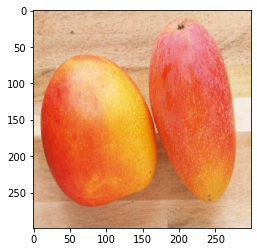

In [56]:
img_path = './998ff2f665a95b69411949fbc0d8722b_620.jpg'
img = read_img(img_path)  # 透過剛創建的函式讀取影像
plt.imshow(img[0])

In [57]:

preds = model.predict(img)  # 預測圖片
index = np.argmax(preds)  # 取得預測結果最大的Index
print("Predicted:", imagenet_labels[index])  # 透過解碼器將輸出轉成標籤

Predicted: spaghetti squash


In [58]:
# 取得預測結果最大的三個indexs
top3_indexs = np.argsort(preds)[0, ::-1][:3]  
print("Predicted:", imagenet_labels[top3_indexs])  # 透過解碼器將輸出轉成標籤

Predicted: ['spaghetti squash' 'pomegranate' 'orange']
